<a href="https://colab.research.google.com/github/tta2yta/Predict_Truck_Speed_ANN/blob/main/truck_speed_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing neccessary library packages** 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files


<b>Loading file to DataFrame</b>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving truck1.xlsx to truck1.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['truck1.xlsx']))

**Displaying top 5 rows of the Truck dataset**

In [ ]:
df.head(5)

,Time,y,distance,Vehicle_type,Course,control_id,lon,speed,lat,fuel,link_quality,num_satellites,type,sender,received,vehicle_id,x,mes_number,fix_status,weight,gps_quality,height
0,2020-02-28 08:02:19,5681383,0.0,truck,251.0,31107,37.723074,0.0,51.255468,-20.0,89,4,11,MessageDetector,43889.334942,9,7410971,NaN,1,0,91,63.836127
1,2020-02-28 08:02:19,5681383,0.0,truck,251.0,31107,37.723074,0.0,51.255468,-20.0,94,3,3,MessageDetector,43889.334942,9,7410971,NaN,2,0,94,63.836127
2,2020-02-28 08:02:19,5681844,0.0,truck,125.0,31106,37.717123,30.0,51.259548,1502.0,95,3,100,MessageDetector,43889.334942,8,7410564,NaN,4,0,94,-33.943062
3,2020-02-28 08:02:19,5681844,0.0,truck,125.0,31106,37.717123,30.0,51.259548,1502.0,97,2,7,MessageDetector,43889.334942,8,7410564,NaN,3,0,100,-33.943062
4,2020-02-28 08:02:19,5681844,0.0,truck,125.0,31106,37.717123,30.0,51.259548,1502.0,96,3,11,MessageDetector,43889.334942,8,7410564,NaN,4,0,99,-33.943062


**Viewing some statistical data like mean, count and standard deviation  for the dependent and independent variables.**

In [ ]:
df[['lon','lat','height','Course','weight','speed']].describe()

,lon,lat,height,Course,weight,speed
count,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000
mean,37.719900,51.261040,-45.920367,-6.382021,24.612724,19.245342
std,0.002332,0.002680,60.035549,110.533748,18.359220,9.658793
min,37.716269,51.255481,-140.223617,-169.689844,0.000000,0.000000
25%,37.717921,51.259306,-107.119016,-113.164275,0.000000,18.120000
50%,37.720104,51.261075,-52.580483,22.199053,36.000000,20.000000
75%,37.721755,51.263592,-2.503833,73.935004,39.000000,28.670000
max,37.724641,51.265437,68.874098,256.000000,45.000000,32.070000


<b>Display Unique values of column Vehicle Type</b>

In [ ]:
df['Vehicle_type'].unique()

array(['truck', 'shovel'], dtype=object)

<b>Filtering the Truck data set with the following criteria
1. selecting only truck values from Vehicle_type column

2. the course column between -180 to 180

3. and speed not equal to zero.

---

Type</b>

In [ ]:
df_Truck=df[(df.Vehicle_type=='truck') & (df.Course <= 180) & (df.Course >= -180) & (df.speed!=0)]

In [ ]:
df_truck_columns=df_truck_columns[(df_truck_columns.Course <= 180) & (df_truck_columns.Course <= 180) & (df_truck_columns.Course >= -180) & (df_truck_columns.speed!=0)]

NameError: ignored

**Slecting the independent and target variables**

In [ ]:

df_truck_columns=df_Truck[['lon','lat','height','Course','weight','speed']]

In [ ]:
df_truck_columns.describe()

,lon,lat,height,Course,weight,speed
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,37.720177,51.260723,-40.285299,-11.244504,23.554832,22.511482
std,0.002113,0.002511,58.706278,100.820519,18.862163,5.938463
min,37.716269,51.255481,-140.223617,-169.689844,0.000000,2.330000
25%,37.718601,51.259236,-87.515959,-112.799140,0.000000,19.020000
50%,37.720269,51.260679,-38.170880,-1.001522,36.000000,20.000000
75%,37.721822,51.262248,3.724907,71.184066,39.000000,29.020000
max,37.724641,51.265437,68.874098,179.004937,45.000000,32.070000


In [ ]:
df_truck_columns.isnull().sum()

lon       0
lat       0
height    0
Course    0
weight    0
speed     0
dtype: int64

**Checking Null values in all the coulmns**

In [ ]:

print(df_truck_columns['lon'].isnull().sum())
print(df_truck_columns['lat'].isnull().sum())
print(df_truck_columns['height'].isnull().sum())
print(df_truck_columns['Course'].isnull().sum())
print(df_truck_columns['weight'].isnull().sum())
print(df_truck_columns['speed'].isnull().sum())

0
0
0
0
0
0


**Checking data type of every column**<BR>
AS it is displayed below all our data is numeric type. We do not have any object type that needs to be converted to numeric values.

In [ ]:
#check data type of every column 
df_truck_columns.dtypes

lon       float64
lat       float64
height    float64
Course    float64
weight      int64
speed     float64
dtype: object

<b>Checking for any empty value</b>

In [ ]:
#check for nay empty value
df_truck_columns[df_truck_columns['lon'] == ''].index 
df_Truck[df_truck_columns['lat'] == ''].index
df_Truck[df_truck_columns['Course'] == ''].index
df_Truck[df_truck_columns['weight'] == ''].index
df_Truck[df_truck_columns['speed'] == ''].index

Int64Index([], dtype='int64')

**Checking outliers**<br>
An outlier is an observation point that is distant from other observations. we will discover outlies with visualization tool and remove them with IQR score<br>

1.Discover outliers with visualization tools
Box plot- a box plot is a method for graphically depicting groups of numerical data through their quartiles.


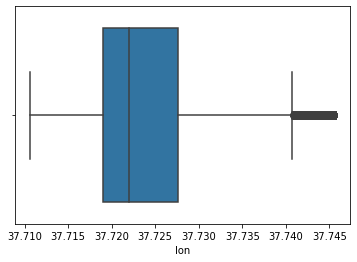

In [ ]:
sns.boxplot(x=df_truck_columns['lon'])

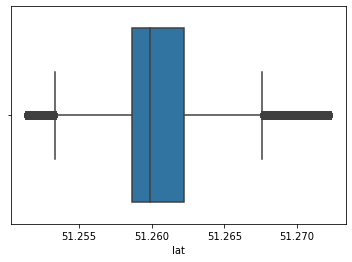

In [ ]:
sns.boxplot(x=df_truck_columns['lat'])

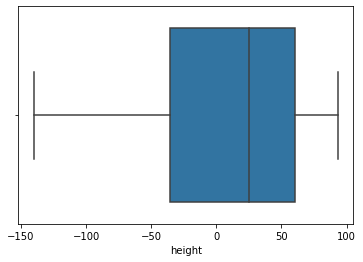

In [ ]:
sns.boxplot(x=df_truck_columns['height'])

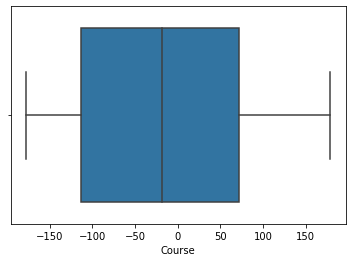

In [ ]:
sns.boxplot(x=df_truck_columns['Course'])

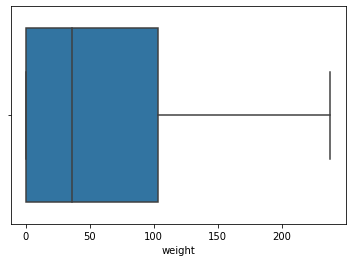

In [ ]:
sns.boxplot(x=df_truck_columns['weight'])

**IQR-** The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. <br>
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers. **bold text** **bold text**

In [ ]:
Q1 = df_truck_columns.quantile(0.25)
Q3 = df_truck_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lon         0.008699
lat         0.003555
height     96.010640
Course    184.452505
weight    103.000000
speed       9.960000
dtype: float64


In [ ]:
df_truck_columns.shape

(129630, 6)

In [ ]:
df_truck_columns = df_truck_columns[~((df_truck_columns < (Q1 - 1.5 * IQR)) |(df_truck_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_truck_columns.shape

(113245, 6)

**Replace values 0-empty when weight < 5; 1-loaded when weight > 5**

In [ ]:
df_truck_columns.loc[(df_Truck['weight'] <= 5),'weight']=0; df_truck_columns.loc[(df_Truck['weight'] > 5),'weight']=1;

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df_truck_columns.head(5)

,lon,lat,height,Course,weight,speed
2,37.717123,51.259548,-33.943062,125.0,0,30.0
3,37.717123,51.259548,-33.943062,125.0,0,30.0
4,37.717123,51.259548,-33.943062,125.0,0,30.0
5,37.717123,51.259548,-33.943062,125.0,0,30.0
57,37.716383,51.256480,68.614850,107.0,1,20.0


In [ ]:
decimals = 2    
df_truck_columns['lon'] = df_truck_columns['lon'].apply(lambda x: round(x, decimals))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_truck_columns['lat'] = df_truck_columns['lat'].apply(lambda x: round(x, decimals))
df_truck_columns['height'] = df_truck_columns['height'].apply(lambda x: round(x, decimals))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_truck_columns.head()

,lon,lat,height,Course,weight,speed
2,37.72,51.26,-33.94,125.0,0,30.0
3,37.72,51.26,-33.94,125.0,0,30.0
4,37.72,51.26,-33.94,125.0,0,30.0
5,37.72,51.26,-33.94,125.0,0,30.0
57,37.72,51.26,68.61,107.0,1,20.0


**Lets now determine the correlation between dependent variable(speed) and independent variable(lon, lat, height, weight, Course)**

In [ ]:
# check correlation between independent variablea and dependent variable
df_truck_columns.corr()

,lon,lat,height,Course,weight,speed
lon,1.000000,0.038513,0.139076,-0.146169,-0.001355,-0.017759
lat,0.038513,1.000000,-0.645342,-0.076539,0.002324,0.005388
height,0.139076,-0.645342,1.000000,0.020099,0.003617,-0.012337
Course,-0.146169,-0.076539,0.020099,1.000000,-0.055692,0.054487
weight,-0.001355,0.002324,0.003617,-0.055692,1.000000,-0.897344
speed,-0.017759,0.005388,-0.012337,0.054487,-0.897344,1.000000


**Placing the input variables(['lon','lat','height','Course','weight']) into separate dataframe variable**

In [ ]:
df_truck_input=df_truck_columns[['lon','lat','height','Course','weight']]

**Placing the output variables(['speed']) into separate dataframe variable.**

In [ ]:
df_truck_output=df_truck_columns[['speed']]

**MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).**



In [ ]:
#Using MinMaxScaler we scale the continuous input variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_truck_input_scaled = pd.DataFrame(scaler.fit_transform(df_truck_input), columns=df_truck_input.columns)

<b>Initial sample split of input variables: 70% for training, 15% for validation, 15% for testing</b>

In [ ]:
 x_train, x_validate, x_test = np.split(df_truck_input_scaled.sample(frac=1, random_state=42), [int(.7*len(df_truck_input)), int(.85*len(df_truck_input))])

In [ ]:
x_train

,lon,lat,height,Course,weight
125764,0.25,0.5,0.890373,0.265067,0.0
24515,0.50,0.5,0.937032,0.703068,1.0
34023,0.25,0.0,0.975001,0.012850,1.0
23986,0.00,0.5,0.735799,0.900358,1.0
119737,0.75,0.5,0.839005,0.148928,1.0
...,...,...,...,...,...
42112,0.25,0.5,0.258465,0.802826,0.0
64147,0.25,0.0,0.895595,0.582307,0.0
128883,0.25,0.5,0.156072,0.259303,0.0
126505,0.25,0.5,0.443346,0.117195,1.0



**Initial sample split of output variable: 70% for training, 15% for validation, 15% for testing**

In [ ]:
y_train, y_validate, y_test = np.split(df_truck_output.sample(frac=1, random_state=42), [int(.7*len(df_truck_output)), int(.85*len(df_truck_output))])

In [ ]:
y_train.shape, x_train.shape

((90741, 1), (90741, 5))

In [ ]:
valid_set=(x_validate, y_validate)

In [ ]:
valid_set

[(             lon       lat    height    Course    weight
  100638  0.371669  0.408345  0.651535  0.747749  0.470588
  74864   0.333035  0.510307  0.264056  0.151896  0.487395
  41123   0.250767  0.390234  0.450364  0.639399  0.000000
  91615   0.129107  0.667451  0.452845  0.159936  0.155462
  87411   0.330869  0.508800  0.263771  0.151896  0.155462
  ...          ...       ...       ...       ...       ...
  17215   0.243561  0.862004  0.837852  0.243302  0.378151
  47475   0.339787  0.879219  0.812909  0.721229  0.000000
  129400  0.369451  0.408203  0.648568  0.712089  0.176471
  111409  0.921448  0.374390  0.781446  0.302652  0.525210
  18227   0.411767  0.128665  0.891913  0.569981  0.168067
  
  [19444 rows x 5 columns],         speed
  376097  20.00
  279697  19.10
  153427  31.59
  342156  20.00
  326473  20.00
  ...       ...
  64403   18.88
  176998  28.47
  483301  20.24
  416139  20.00
  68109   21.02
  
  [19444 rows x 1 columns])]

**Define Keras Model**<br>
I have used a Sequential model and add layers one at a time until we are happy with our network architecture.The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the **input_dim** argument and setting it to 5 for the 5 input variables.<br>
Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.Regarding to this dataset I have used three hidden layers having each 64, 32 and 16 neurons respectivelly.The first two hidden layes uses activation function **sigmoid** while the third hidden layer uses **Relu** activation function. I have used Relu activation function for the output layer because the output variable is continous numeric value and as he range of ReLu is [0, inf).

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

I have used loss type **mean_square_error** with an optimizer called **adam**.**Adam** is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

In [ ]:
# compile the keras model  #binary_crossentropy
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])

Then we fit the defined model with our training and validation sample datasets.<br>
**Training Dataset:** The sample of data used to fit the model.<br>
**Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.<br>
**Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.<br>

The **batch size** is a number of samples processed before the model is updated.The batch_size is set to 100 for this model.The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.<br>

The number of **epochs** is the number of complete passes through the training dataset. The number of epoches is set to 1000 for this model.
The number of epochs can be set to an integer value between one and infinity.


In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=1000, validation_data=valid_set, batch_size=100)

Epoch 1/1000
908/908 [==============================] - 1s 1ms/step - loss: 78.4113 - MSE: 78.4113 - val_loss: 31.4479 - val_MSE: 31.4479
Epoch 2/1000
908/908 [==============================] - 1s 1ms/step - loss: 14.7332 - MSE: 14.7332 - val_loss: 7.9463 - val_MSE: 7.9463
Epoch 3/1000
908/908 [==============================] - 1s 1ms/step - loss: 8.1149 - MSE: 8.1149 - val_loss: 7.9305 - val_MSE: 7.9305
Epoch 4/1000
908/908 [==============================] - 1s 1ms/step - loss: 8.1024 - MSE: 8.1024 - val_loss: 7.9529 - val_MSE: 7.9529
Epoch 5/1000
908/908 [==============================] - 1s 1ms/step - loss: 8.1020 - MSE: 8.1020 - val_loss: 8.0732 - val_MSE: 8.0732
Epoch 6/1000
908/908 [==============================] - 1s 1ms/step - loss: 8.1031 - MSE: 8.1031 - val_loss: 7.9042 - val_MSE: 7.9042
Epoch 7/1000
908/908 [==============================] - 1s 1ms/step - loss: 8.1019 - MSE: 8.1019 - val_loss: 7.9038 - val_MSE: 7.9038
Epoch 8/1000
908/908 [==============================] - 

The model have been trained our neural network on the entire dataset and and we have got Mean Square Error of 2.9988 and validation mean square error of 2.9988. The correlation between dependent variable(speed) and independent variable(lon, lat, height, Course and weight) in our dataset is very week.So That could be the main reason for the loss to be a little high.

Now, we can predict values with **predict** function. Test samples are passes to predict function of the keras trained model and you can compare the predicted value with the actual set (y_test).


In [ ]:
predictions = model.predict(x_test)


**Now let see the Actual and predicted values in one table side by side.**

In [ ]:
df_Actual_Predicted = pd.DataFrame({'Actual':y_test.to_numpy().tolist(),'Predicted':predictions.tolist()}, columns=['Actual','Predicted'])

In [ ]:
df_Actual_Predicted.head()


,Actual,Predicted
0,[20.0],[19.040729522705078]
1,[18.67],[19.47036361694336]
2,[19.39],[19.266071319580078]
3,[30.0],[24.886276245117188]
4,[18.48],[19.34760284423828]
